# CUSTOMER SEGMENTATION USING HIERARCHICAL CLUSTERING 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/Users/soumobratamanna/Documents/AI_ML PROJECTS/mcdonalds.csv")

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
data.shape

(1453, 15)

In [6]:
data.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

In [7]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
#Encoding 
data.replace({'yummy':{'Yes':1,'No':0}},inplace=True)
data.replace({'convenient':{'Yes':1,'No':0}},inplace=True)
data.replace({'spicy':{'Yes':1,'No':0}},inplace=True)
data.replace({'fattening':{'Yes':1,'No':0}},inplace=True)
data.replace({'greasy':{'Yes':1,'No':0}},inplace=True)
data.replace({'fast':{'Yes':1,'No':0}},inplace=True)
data.replace({'cheap':{'Yes':1,'No':0}},inplace=True)
data.replace({'tasty':{'Yes':1,'No':0}},inplace=True)
data.replace({'expensive':{'Yes':1,'No':0}},inplace=True)
data.replace({'healthy':{'Yes':1,'No':0}},inplace=True)
data.replace({'disgusting':{'Yes':1,'No':0}},inplace=True)
data.replace({'Like':{'I love it!+5':1,'I hate it!-5':2}},inplace=True)
data.replace({'VisitFrequency':{'Every three months':1,'Never':0,'Once a month':2,'Once a year':3,'More than once a week':4,'Once a week':5}},inplace=True)
data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)


In [9]:
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,1,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,1,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,5,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,2,1
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,1,1
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,1,0
7,1,1,0,1,1,1,1,1,0,0,0,1,23,5,0
8,0,0,0,1,1,0,0,0,1,0,1,2,58,3,1
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,1,0


In [10]:
data.tail(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1443,1,1,0,1,0,1,1,1,0,0,0,+2,50,3,0
1444,0,1,0,1,1,1,1,0,0,1,0,-3,55,0,1
1445,0,1,0,1,1,1,1,1,0,0,1,+1,18,2,0
1446,1,1,0,1,1,1,1,1,0,1,0,+1,52,1,0
1447,0,1,0,1,1,0,0,1,1,0,0,0,43,2,1
1448,0,1,0,1,1,0,0,0,1,0,1,2,47,3,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,5,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,2,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,1,1
1452,0,1,0,1,1,0,0,0,1,0,1,-3,30,1,1


In [11]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [15]:
feature = data.iloc[:,[12,13,14]]

In [16]:
feature.head(10)

,Age,VisitFrequency,Gender
0,61,1,0
1,51,1,0
2,62,1,0
3,69,5,0
4,49,2,1
5,55,1,1
6,56,1,0
7,23,5,0
8,58,3,1
9,32,1,0


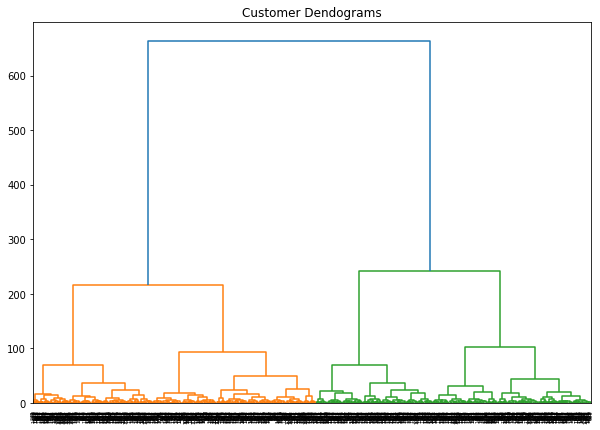

In [18]:
plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend=sch.dendrogram(sch.linkage(feature,method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(feature)

array([0, 1, 0, ..., 1, 4, 2])

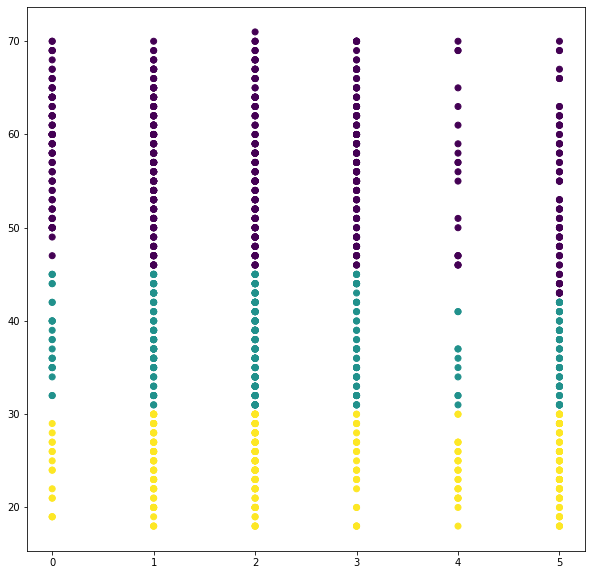

In [21]:
from sklearn.cluster import AgglomerativeClustering 
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(feature)
plt.figure(figsize=(10,10))
plt.scatter(feature["VisitFrequency"],feature["Age"],c=cluster.labels_)